# Analyzing the type of housing construction in Highest or High Resource areas of Los Angeles
### Making a case for the lack of, and need for affordable housing production to be directed to high opportunity neighborhoods

Working with the base dataset, which is the TCAC opportunity map

In [1]:
# importing geospatial libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# read and add shapefile to notebook using url
# tried using shp file but didnt work- ask q
url = "https://www.treasurer.ca.gov/ctcac/opportunity/2023/final_2023_shapefile.zip"
TCAC = gpd.read_file(url)



In [3]:
#data type
type(TCAC)

geopandas.geodataframe.GeoDataFrame

In [4]:
# checking out the data
TCAC.head()

fips fips_bg  cnty_nm countyd           region   ecn_dmn   env_hl_  \
0  06001400100    None  Alameda   06001  Bay Area Region  0.796927  0.927856   
1  06001400200    None  Alameda   06001  Bay Area Region  0.960588  0.627255   
2  06001400300    None  Alameda   06001  Bay Area Region  0.927188  0.619238   
3  06001400400    None  Alameda   06001  Bay Area Region  0.872411  0.657983   
4  06001400500    None  Alameda   06001  Bay Area Region  0.759519  0.698063   

    ed_domn     index            oppcat  \
0  0.787575  0.590095  Highest Resource   
1  0.810955  0.701320  Highest Resource   
2  0.324649  0.210942     High Resource   
3  0.523046  0.358539     High Resource   
4  0.566466  0.310218     High Resource   

                                            geometry  
0  POLYGON ((-122.23418 37.85254, -122.23428 37.8...  
1  POLYGON ((-122.25253 37.85110, -122.25094 37.8...  
2  POLYGON ((-122.26417 37.83787, -122.26427 37.8...  
3  POLYGON ((-122.26081 37.84869, -122.26023 37.8...  
4  POLYGON ((-122.26023 37.85274, -122.26081 37.8...

In [5]:
# no. of rows and columns
TCAC.shape

(10136, 11)

In [6]:
TCAC.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      10136 non-null  object  
 1   fips_bg   3093 non-null   object  
 2   cnty_nm   10136 non-null  object  
 3   countyd   10136 non-null  object  
 4   region    10136 non-null  object  
 5   ecn_dmn   9747 non-null   float64 
 6   env_hl_   9747 non-null   float64 
 7   ed_domn   9747 non-null   float64 
 8   index     9233 non-null   float64 
 9   oppcat    9747 non-null   object  
 10  geometry  10133 non-null  geometry
dtypes: float64(4), geometry(1), object(6)
memory usage: 871.2+ KB


In [7]:
TCAC.dtypes

fips          object
fips_bg       object
cnty_nm       object
countyd       object
region        object
ecn_dmn      float64
env_hl_      float64
ed_domn      float64
index        float64
oppcat        object
geometry    geometry
dtype: object

In [8]:
TCAC.columns.to_list()

['fips',
 'fips_bg',
 'cnty_nm',
 'countyd',
 'region',
 'ecn_dmn',
 'env_hl_',
 'ed_domn',
 'index',
 'oppcat',
 'geometry']

In [9]:
#seeing only county names
TCAC['cnty_nm'].sample(5)

1233         Fresno
2305    Los Angeles
3114    Los Angeles
6953      San Diego
7004      San Diego
Name: cnty_nm, dtype: object

In [10]:
# listing counties and the number of census tracts in each county
TCAC['cnty_nm'].value_counts()

Los Angeles        2365
San Diego           685
Orange              583
Riverside           509
San Bernardino      472
Santa Clara         378
Alameda             361
Sacramento          335
Fresno              315
Kern                235
Contra Costa        213
Sonoma              197
San Francisco       196
Ventura             195
Butte               195
Tulare              174
San Joaquin         174
San Mateo           172
Stanislaus          159
Monterey            141
Placer              137
Shasta              131
San Luis Obispo     118
Santa Barbara       117
Solano              112
Humboldt            108
Merced               98
El Dorado            92
Santa Cruz           89
Mendocino            79
Nevada               75
Imperial             70
Marin                67
Napa                 63
Sutter               62
Madera               59
Kings                57
Yolo                 51
Yuba                 49
Lake                 48
Tuolumne             48
Tehama          

In [11]:
#trimming data
TCAC.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      10136 non-null  object  
 1   fips_bg   3093 non-null   object  
 2   cnty_nm   10136 non-null  object  
 3   countyd   10136 non-null  object  
 4   region    10136 non-null  object  
 5   ecn_dmn   9747 non-null   float64 
 6   env_hl_   9747 non-null   float64 
 7   ed_domn   9747 non-null   float64 
 8   index     9233 non-null   float64 
 9   oppcat    9747 non-null   object  
 10  geometry  10133 non-null  geometry
dtypes: float64(4), geometry(1), object(6)
memory usage: 871.2+ KB


In [12]:
#showing desired columns of county name, opportunity and geometry
TCAC[['fips','cnty_nm','oppcat','geometry']]

fips  cnty_nm             oppcat  \
0      06001400100  Alameda   Highest Resource   
1      06001400200  Alameda   Highest Resource   
2      06001400300  Alameda      High Resource   
3      06001400400  Alameda      High Resource   
4      06001400500  Alameda      High Resource   
...            ...      ...                ...   
10131  06115041000     Yuba               None   
10132  06115041100     Yuba  Moderate Resource   
10133  06115041100     Yuba   Highest Resource   
10134  06115041100     Yuba  Moderate Resource   
10135  06115041100     Yuba               None   

                                                geometry  
0      POLYGON ((-122.23418 37.85254, -122.23428 37.8...  
1      POLYGON ((-122.25253 37.85110, -122.25094 37.8...  
2      POLYGON ((-122.26417 37.83787, -122.26427 37.8...  
3      POLYGON ((-122.26081 37.84869, -122.26023 37.8...  
4      POLYGON ((-122.26023 37.85274, -122.26081 37.8...  
...                                                  ...  
10131  POLYGON ((-121.63631 39.24941, -121.63581 39.2...  
10132  POLYGON ((-121.27892 39.49773, -121.27724 39.5...  
10133  POLYGON ((-121.32330 39.36354, -121.32129 39.3...  
10134  POLYGON ((-121.28387 39.46216, -121.27864 39.4...  
10135  POLYGON ((-121.37257 39.37358, -121.37048 39.3...  

[10136 rows x 4 columns]

In [13]:
#creating a list of desired columns
desired_columns =['fips','cnty_nm','oppcat','geometry']
desired_columns

['fips', 'cnty_nm', 'oppcat', 'geometry']

In [14]:
#trimming data to the 3 desired columns and creating a new dataset
TCAC_cleared = TCAC[desired_columns].copy()
TCAC_cleared

fips  cnty_nm             oppcat  \
0      06001400100  Alameda   Highest Resource   
1      06001400200  Alameda   Highest Resource   
2      06001400300  Alameda      High Resource   
3      06001400400  Alameda      High Resource   
4      06001400500  Alameda      High Resource   
...            ...      ...                ...   
10131  06115041000     Yuba               None   
10132  06115041100     Yuba  Moderate Resource   
10133  06115041100     Yuba   Highest Resource   
10134  06115041100     Yuba  Moderate Resource   
10135  06115041100     Yuba               None   

                                                geometry  
0      POLYGON ((-122.23418 37.85254, -122.23428 37.8...  
1      POLYGON ((-122.25253 37.85110, -122.25094 37.8...  
2      POLYGON ((-122.26417 37.83787, -122.26427 37.8...  
3      POLYGON ((-122.26081 37.84869, -122.26023 37.8...  
4      POLYGON ((-122.26023 37.85274, -122.26081 37.8...  
...                                                  ...  
10131  POLYGON ((-121.63631 39.24941, -121.63581 39.2...  
10132  POLYGON ((-121.27892 39.49773, -121.27724 39.5...  
10133  POLYGON ((-121.32330 39.36354, -121.32129 39.3...  
10134  POLYGON ((-121.28387 39.46216, -121.27864 39.4...  
10135  POLYGON ((-121.37257 39.37358, -121.37048 39.3...  

[10136 rows x 4 columns]

In [15]:
#filtering to show only los angeles county data
TCAC_cleared.loc[TCAC_cleared['cnty_nm'] == 'Los Angeles']
LA = TCAC_cleared.loc[TCAC_cleared['cnty_nm'] == 'Los Angeles']

In [16]:
LA

fips      cnty_nm             oppcat  \
1858  06037101110  Los Angeles  Moderate Resource   
1859  06037101122  Los Angeles      High Resource   
1860  06037101210  Los Angeles  Moderate Resource   
1861  06037101220  Los Angeles  Moderate Resource   
1862  06037101300  Los Angeles      High Resource   
...           ...          ...                ...   
4218  06037980030  Los Angeles               None   
4219  06037980031  Los Angeles               None   
4220  06037980033  Los Angeles               None   
4221  06037990200  Los Angeles               None   
4222  06037990300  Los Angeles               None   

                                               geometry  
1858  POLYGON ((-118.28862 34.25591, -118.29104 34.2...  
1859  POLYGON ((-118.27728 34.26196, -118.27742 34.2...  
1860  POLYGON ((-118.28862 34.24861, -118.28968 34.2...  
1861  POLYGON ((-118.27802 34.24961, -118.27712 34.2...  
1862  POLYGON ((-118.27728 34.25991, -118.26529 34.2...  
...                                                 ...  
4218  POLYGON ((-118.43001 33.91677, -118.42991 33.9...  
4219  POLYGON ((-118.26359 33.70463, -118.27475 33.7...  
4220  POLYGON ((-118.18207 33.72302, -118.20623 33.7...  
4221  POLYGON ((-118.41149 33.79360, -118.41142 33.7...  
4222  POLYGON ((-118.23194 33.71062, -118.25869 33.7...  

[2365 rows x 4 columns]

In [17]:
LA["geometry"]

1858    POLYGON ((-118.28862 34.25591, -118.29104 34.2...
1859    POLYGON ((-118.27728 34.26196, -118.27742 34.2...
1860    POLYGON ((-118.28862 34.24861, -118.28968 34.2...
1861    POLYGON ((-118.27802 34.24961, -118.27712 34.2...
1862    POLYGON ((-118.27728 34.25991, -118.26529 34.2...
                              ...                        
4218    POLYGON ((-118.43001 33.91677, -118.42991 33.9...
4219    POLYGON ((-118.26359 33.70463, -118.27475 33.7...
4220    POLYGON ((-118.18207 33.72302, -118.20623 33.7...
4221    POLYGON ((-118.41149 33.79360, -118.41142 33.7...
4222    POLYGON ((-118.23194 33.71062, -118.25869 33.7...
Name: geometry, Length: 2365, dtype: geometry

In [18]:
type(LA)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

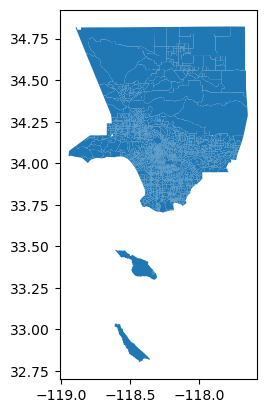

In [19]:
#plotting only LA county
LA.plot()

<AxesSubplot: >

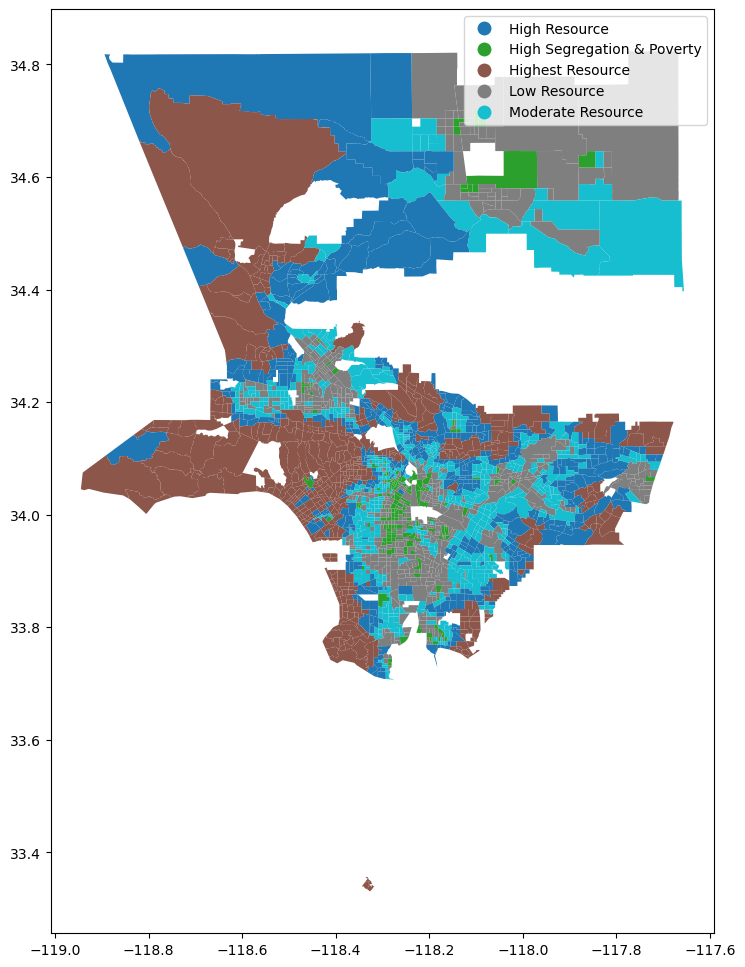

In [20]:
#adding colour to the plot
LA.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default). WHAT ARE THE DIMENSION UNITS?
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1), 
            }                  # this puts the legend to the side
    
) 

## Importing a boundary file for the CIty of Los Angeles

In [21]:
#importing city boundary file
zipfile = "data/City_Boundary.zip"
cityofla = gpd.read_file(zipfile)

In [22]:
cityofla.head

<bound method NDFrame.head of    OBJECTID CITY                                           geometry
0         1   IN  POLYGON ((-118.42000 34.32917, -118.41948 34.3...>

In [23]:
#making sure its a geodataframe
type(cityofla)

geopandas.geodataframe.GeoDataFrame

In [24]:
citytracts = cityofla.overlay(LA, how='intersection')

In [25]:
#now let's see if that worked
citytracts.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  1152 non-null   int64   
 1   CITY      1152 non-null   object  
 2   fips      1152 non-null   object  
 3   cnty_nm   1152 non-null   object  
 4   oppcat    1124 non-null   object  
 5   geometry  1152 non-null   geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 54.1+ KB


In [26]:
#checking the coordinate system
citytracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

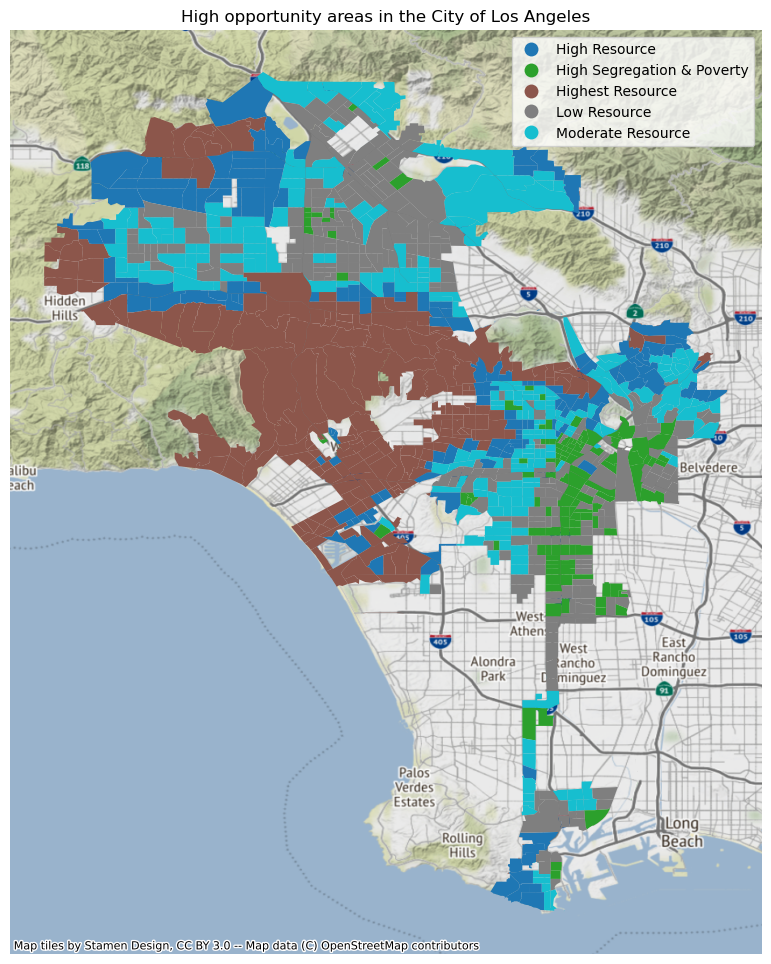

In [27]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
citytracts.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('High opportunity areas in the City of Los Angeles')

# add a basemap
ctx.add_basemap(ax, crs=4326) 

In [28]:
#finding unique values in the oppcat column
citytracts.oppcat.unique()

array(['Moderate Resource', 'High Resource', 'Low Resource',
       'High Segregation & Poverty', 'Highest Resource', None],
      dtype=object)

In [29]:
#assigning colors to each oppcat category and creating a color column
citytracts.loc[citytracts['oppcat'] == 'Highest Resource', 'color'] = '#38B9E0'
citytracts.loc[citytracts['oppcat'] == 'High Resource', 'color'] = '#60DAE6'
citytracts.loc[citytracts['oppcat'] == 'Moderate Resource', 'color'] = '#FFFFFF'
citytracts.loc[citytracts['oppcat'] == 'Low Resource', 'color'] = '#FFFFFF'
citytracts.loc[citytracts['oppcat'] == 'High Segregation & Poverty', 'color'] = '#FFFFFF'

In [30]:
citytracts.sample(10)

OBJECTID CITY         fips      cnty_nm                      oppcat  \
60           1   IN  06037108101  Los Angeles            Highest Resource   
1060         1   IN  06037600802  Los Angeles           Moderate Resource   
2            1   IN  06037101210  Los Angeles           Moderate Resource   
637          1   IN  06037216401  Los Angeles            Highest Resource   
1090         1   IN  06037700400  Los Angeles            Highest Resource   
480          1   IN  06037197500  Los Angeles               High Resource   
440          1   IN  06037191810  Los Angeles           Moderate Resource   
562          1   IN  06037209102  Los Angeles  High Segregation & Poverty   
389          1   IN  06037187101  Los Angeles               High Resource   
427          1   IN  06037191120  Los Angeles           Moderate Resource   

                                               geometry    color  
60    POLYGON ((-118.54290 34.28585, -118.54247 34.2...  #38B9E0  
1060  MULTIPOLYGON (((-118.33308 33.96725, -118.3330...  #FFFFFF  
2     POLYGON ((-118.28968 34.24908, -118.29000 34.2...  #FFFFFF  
637   POLYGON ((-118.38358 34.05710, -118.38353 34.0...  #38B9E0  
1090  MULTIPOLYGON (((-118.37034 34.08017, -118.3703...  #38B9E0  
480   POLYGON ((-118.25929 34.06894, -118.25980 34.0...  #60DAE6  
440   POLYGON ((-118.32662 34.09074, -118.32444 34.0...  #FFFFFF  
562   POLYGON ((-118.26582 34.05712, -118.26593 34.0...  #FFFFFF  
389   POLYGON ((-118.25708 34.12123, -118.25663 34.1...  #60DAE6  
427   POLYGON ((-118.30920 34.09390, -118.30921 34.0...  #FFFFFF

In [31]:
citytracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  1152 non-null   int64   
 1   CITY      1152 non-null   object  
 2   fips      1152 non-null   object  
 3   cnty_nm   1152 non-null   object  
 4   oppcat    1124 non-null   object  
 5   geometry  1152 non-null   geometry
 6   color     1124 non-null   object  
dtypes: geometry(1), int64(1), object(5)
memory usage: 63.1+ KB


In [32]:
#counting number of census tracts under each opportunity category
citytracts.groupby('oppcat').count()

OBJECTID  CITY  fips  cnty_nm  geometry  color
oppcat                                                                    
High Resource                    181   181   181      181       181    181
High Segregation & Poverty       127   127   127      127       127    127
Highest Resource                 247   247   247      247       247    247
Low Resource                     304   304   304      304       304    304
Moderate Resource                265   265   265      265       265    265

In [33]:
#trying to see if oppcat has any NaN values, because of which the map wasn't plotting based on the color column
citytracts['oppcat'].isnull().values.any()


True

In [34]:
#dropping rows with NaN values
citytracts.dropna(subset=['oppcat'], how='all', inplace=True)

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


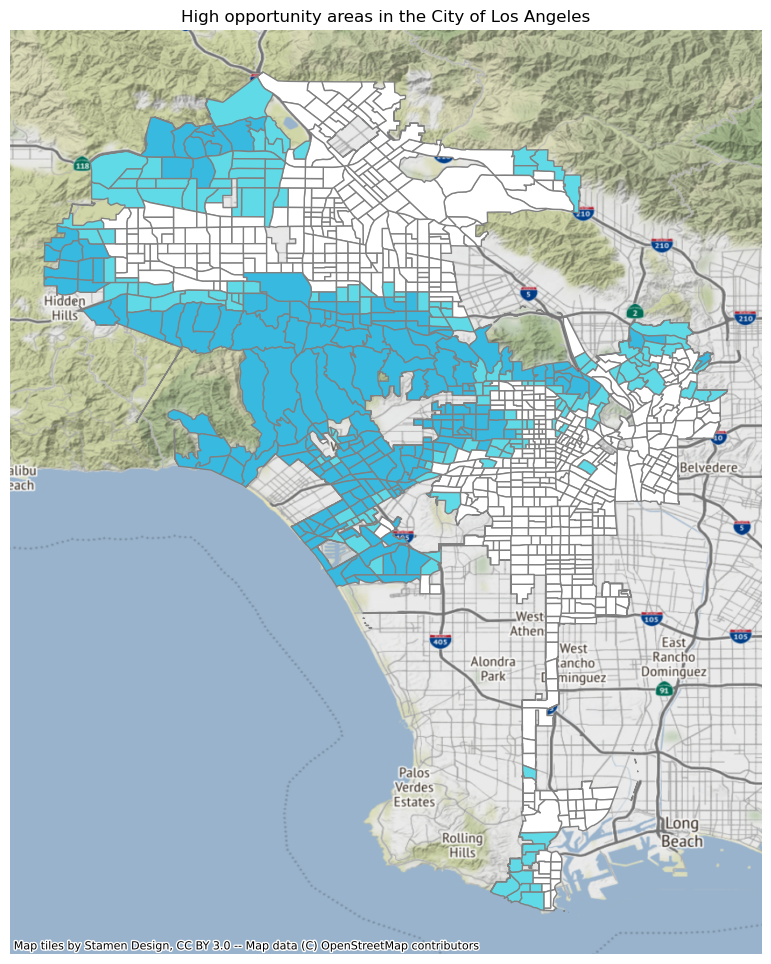

In [35]:
#plotting with assigned colours
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))

#adding colour to the plot
citytracts.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            color = citytracts['color'], #to color according to the TCAC values, based on a new column
            legend = True,     # add a legend        
            
            edgecolor = 'grey',
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
          
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('High opportunity areas in the City of Los Angeles')

# add a basemap
ctx.add_basemap(ax, crs=4326)

In [36]:
#keeping only high and highest resource census tracts
citytracts.loc[citytracts['oppcat'].isin(['High Resource','Highest Resource'])]

OBJECTID CITY         fips      cnty_nm            oppcat  \
1            1   IN  06037101122  Los Angeles     High Resource   
4            1   IN  06037101300  Los Angeles     High Resource   
10           1   IN  06037103101  Los Angeles     High Resource   
11           1   IN  06037103102  Los Angeles     High Resource   
49           1   IN  06037106603  Los Angeles     High Resource   
...        ...  ...          ...          ...               ...   
1126         1   IN  06037800506  Los Angeles  Highest Resource   
1127         1   IN  06037920303  Los Angeles  Highest Resource   
1128         1   IN  06037920312  Los Angeles     High Resource   
1130         1   IN  06037930200  Los Angeles  Highest Resource   
1146         1   IN  06037980024  Los Angeles  Highest Resource   

                                               geometry    color  
1     POLYGON ((-118.27742 34.25990, -118.27817 34.2...  #60DAE6  
4     POLYGON ((-118.26528 34.25238, -118.26530 34.2...  #60DAE6  
10    POLYGON ((-118.29975 34.27671, -118.29970 34.2...  #60DAE6  
11    POLYGON ((-118.31573 34.26697, -118.31400 34.2...  #60DAE6  
49    POLYGON ((-118.54083 34.29882, -118.54157 34.3...  #60DAE6  
...                                                 ...      ...  
1126  MULTIPOLYGON (((-118.56715 34.04141, -118.5671...  #38B9E0  
1127  MULTIPOLYGON (((-118.54671 34.29787, -118.5409...  #38B9E0  
1128  POLYGON ((-118.50820 34.33401, -118.50789 34.3...  #60DAE6  
1130  MULTIPOLYGON (((-118.38289 34.29696, -118.3828...  #38B9E0  
1146  POLYGON ((-118.46793 34.17625, -118.46754 34.1...  #38B9E0  

[428 rows x 7 columns]

In [37]:
TCAC_trimmed = citytracts.loc[citytracts['oppcat'].isin(['High Resource','Highest Resource'])].copy()
TCAC_trimmed.sample(5)

OBJECTID CITY         fips      cnty_nm            oppcat  \
302          1   IN  06037137103  Los Angeles     High Resource   
636          1   IN  06037216300  Los Angeles  Highest Resource   
358          1   IN  06037183103  Los Angeles     High Resource   
1017         1   IN  06037481901  Los Angeles     High Resource   
78           1   IN  06037111202  Los Angeles     High Resource   

                                               geometry    color  
302   POLYGON ((-118.60151 34.17917, -118.59753 34.1...  #60DAE6  
636   POLYGON ((-118.37602 34.05962, -118.37601 34.0...  #38B9E0  
358   POLYGON ((-118.16767 34.12179, -118.16888 34.1...  #60DAE6  
1017  MULTIPOLYGON (((-118.16174 34.07438, -118.1617...  #60DAE6  
78    POLYGON ((-118.50328 34.27204, -118.50220 34.2...  #60DAE6

In [38]:
# converting the data to a neighborhood scale
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [39]:
#seeing the neighborhoods data
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  114 non-null    int64   
 1   name      114 non-null    object  
 2   geometry  114 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.8+ KB


In [40]:
neighborhoods.head()

OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...

In [41]:
print(ctx.providers.MapBox.keys())

dict_keys(['url', 'html_attribution', 'attribution', 'tileSize', 'max_zoom', 'zoomOffset', 'id', 'accessToken', 'name'])


/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


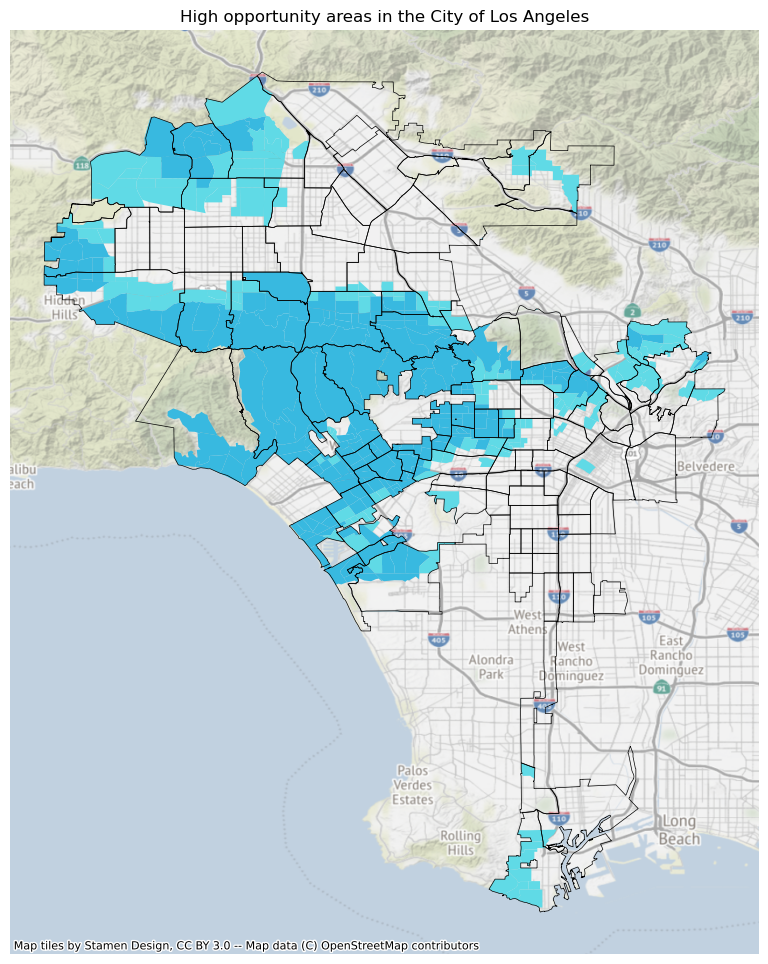

In [42]:
#plotting with neighborhood boundaries
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
TCAC_trimmed.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            color = TCAC_trimmed['color'], #to color according to the TCAC values, based on a new column
            legend = True,     # add a legend        
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
neighborhoods.plot(
            ax=ax,                
            color = "none",        
            edgecolor = 'black',
            linewidth = 0.5,
            )
          
    
    
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('High opportunity areas in the City of Los Angeles')

# add a basemap at 40% transparency
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Stamen.Terrain, alpha=0.60)

## Analyzing affordable housing development in high resource areas

In [43]:
#importing building permit data to then filter projects built in the last 5 years
#additional column inserted AFFD where NOAH = no affordable housing, and AH = affordable housing, based on work description
newunits = pd.read_csv ("data/AFFD_Building_Permits__New_Housing_Units_AFFD.csv")

/tmp/ipykernel_170/718619000.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  newunits = pd.read_csv ("data/AFFD_Building_Permits__New_Housing_Units_AFFD.csv")


In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
newunits.head()

Assessor Book Assessor Page Assessor Parcel  \
0         4211.0            27               6   
1         5420.0            15              20   
2         2673.0             6              45   
3         4362.0             3              43   
4         2673.0             6              49   

                                               Tract Block Lot  \
0                                      TR 49104-06-C   NaN  19   
1  BLOCKS NO'S. 11, 12, 13, 14, 15, 16, 17, 18, 1...    21  18   
2                                           TR 74704   NaN   1   
3                                            TR 7656     6   9   
4                                           TR 74704   NaN   5   

  Reference # (Old Permit #)      PCIS Permit #    Permit Type  \
0                  19WL99310  19010-30000-00548       Bldg-New   
1                  21LA01334  19010-10000-06113       Bldg-New   
2                  21ON 2734  18010-20000-01399       Bldg-New   
3                  17VN34261  14010-10001-03040  Bldg-Addition   
4                  21ON 2735  18010-20000-01403       Bldg-New   

          Permit Sub-Type Permit Category  Project Number  Event Code  \
0  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
1  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
2  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
3  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
4  1 or 2 Family Dwelling      Plan Check             NaN         NaN   

  Initiating Office Issue Date  Address Start Address Fraction Start  \
0           WEST LA  5/31/2019           6500                    NaN   
1             METRO  9/30/2021           1950                    NaN   
2          VAN NUYS  1/22/2021          15827                    NaN   
3             METRO   2/1/2017            627                    NaN   
4          VAN NUYS  1/22/2021          15803                    NaN   

   Address End Address Fraction End Street Direction  Street Name  \
0         6500                  NaN                S     SEABLUFF   
1         1950                  NaN                N       VESTAL   
2        15827                  NaN                W         NAPA   
3          627                  NaN                N  CARCASSONNE   
4        15803                  NaN                W         NAPA   

  Street Suffix Suffix Direction Unit Range Start Unit Range End  Zip Code  \
0            DR              NaN              NaN            NaN   90094.0   
1           AVE              NaN              NaN            NaN   90026.0   
2            ST              NaN              NaN            NaN   91343.0   
3          ROAD              NaN              NaN            NaN   90077.0   
4            ST              NaN              NaN            NaN   91343.0   

                                    Work Description  AFFD  Valuation  \
0  Three story single family dwelling with attcah...  NOAH   401000.0   
1  NEW 3-STORY SINGLE FAMILY RESIDENCE - 2389 SQF...  NOAH   298625.0   
2  NEW 34'-0" x 47'-4" TWO-STORY SINGLE FAMILY DW...  NOAH   260000.0   
3  1.) SUPPLEMENTAL TO 14010-30000-03040 FOR CHAN...  NOAH   500000.0   
4  NEW 34'-0" x 47'-6" TWO-STORY SINGLE FAMILY DW...  NOAH   260000.0   

   Floor Area-L.A. Zoning Code Definition  # of Residential Dwelling Units  \
0                                  3664.0                                1   
1                                  2389.0                                1   
2                                  2217.0                                1   
3                                 20381.0                                1   
4                                  2217.0                                1   

   # of Stories Contractor's Business Name    Contractor Address  \
0           3.0              OWNER-BUILDER                   NaN   
1           3.0       TOSTY'S CONSTRUCTION  3455 CATTARAUGUS AVE   
2           2.0              OWNER-BUILD

In [45]:
newunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062 entries, 0 to 25061
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Assessor Book                             25029 non-null  float64
 1   Assessor Page                             25029 non-null  object 
 2   Assessor Parcel                           25029 non-null  object 
 3   Tract                                     24956 non-null  object 
 4   Block                                     5435 non-null   object 
 5   Lot                                       24953 non-null  object 
 6   Reference # (Old Permit #)                25049 non-null  object 
 7   PCIS Permit #                             25062 non-null  object 
 8   Permit Type                               25062 non-null  object 
 9   Permit Sub-Type                           25062 non-null  object 
 10  Permit Category                   

In [46]:
# seeing which columns have a zero value
newunits.columns[newunits.isna().all()].tolist()

['Event Code']

In [47]:
#checking the type of permits in newunits
newunits['Permit Type'].value_counts()

Bldg-New             22551
Bldg-Alter/Repair     1472
Bldg-Addition         1011
Fire Sprinkler           7
Nonbldg-New              6
Bldg-Relocation          5
Plumbing                 4
Grading                  2
Bldg-Demolition          1
Electrical               1
Elevator                 1
HVAC                     1
Name: Permit Type, dtype: int64

In [48]:
#renaming column to LatLont to remove special characters
newunits.rename(columns={'Latitude/Longitude':'LatLong'}, inplace=True)

In [49]:
newunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062 entries, 0 to 25061
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Assessor Book                             25029 non-null  float64
 1   Assessor Page                             25029 non-null  object 
 2   Assessor Parcel                           25029 non-null  object 
 3   Tract                                     24956 non-null  object 
 4   Block                                     5435 non-null   object 
 5   Lot                                       24953 non-null  object 
 6   Reference # (Old Permit #)                25049 non-null  object 
 7   PCIS Permit #                             25062 non-null  object 
 8   Permit Type                               25062 non-null  object 
 9   Permit Sub-Type                           25062 non-null  object 
 10  Permit Category                   

In [50]:
#showing a subset of columns required for analysis
newunits[['Tract','Permit Type','Permit Sub-Type','Issue Date','# of Residential Dwelling Units','AFFD','Zone','Census Tract','Latitude','Longitude']].head()

Tract    Permit Type  \
0                                      TR 49104-06-C       Bldg-New   
1  BLOCKS NO'S. 11, 12, 13, 14, 15, 16, 17, 18, 1...       Bldg-New   
2                                           TR 74704       Bldg-New   
3                                            TR 7656  Bldg-Addition   
4                                           TR 74704       Bldg-New   

          Permit Sub-Type Issue Date  # of Residential Dwelling Units  AFFD  \
0  1 or 2 Family Dwelling  5/31/2019                                1  NOAH   
1  1 or 2 Family Dwelling  9/30/2021                                1  NOAH   
2  1 or 2 Family Dwelling  1/22/2021                                1  NOAH   
3  1 or 2 Family Dwelling   2/1/2017                                1  NOAH   
4  1 or 2 Family Dwelling  1/22/2021                                1  NOAH   

         Zone  Census Tract  Latitude  Longitude  
0      R4(PV)       2756.02  33.97210 -118.42177  
1     RD2-1VL       1974.10  34.08801 -118.25256  
2  (T)(Q)R1-1       1174.04  34.22664 -118.47725  
3    RE40-1-H       2621.00       NaN        NaN  
4  (T)(Q)R1-1       1174.04  34.22664 -118.47668

In [51]:
#creating  new dataset with trimmed columns
newunits_trimmed = newunits[['Tract','Permit Type','Permit Sub-Type','Issue Date','# of Residential Dwelling Units','AFFD','Zone','Census Tract','Latitude','Longitude']]
newunits_trimmed.head()

Tract    Permit Type  \
0                                      TR 49104-06-C       Bldg-New   
1  BLOCKS NO'S. 11, 12, 13, 14, 15, 16, 17, 18, 1...       Bldg-New   
2                                           TR 74704       Bldg-New   
3                                            TR 7656  Bldg-Addition   
4                                           TR 74704       Bldg-New   

          Permit Sub-Type Issue Date  # of Residential Dwelling Units  AFFD  \
0  1 or 2 Family Dwelling  5/31/2019                                1  NOAH   
1  1 or 2 Family Dwelling  9/30/2021                                1  NOAH   
2  1 or 2 Family Dwelling  1/22/2021                                1  NOAH   
3  1 or 2 Family Dwelling   2/1/2017                                1  NOAH   
4  1 or 2 Family Dwelling  1/22/2021                                1  NOAH   

         Zone  Census Tract  Latitude  Longitude  
0      R4(PV)       2756.02  33.97210 -118.42177  
1     RD2-1VL       1974.10  34.08801 -118.25256  
2  (T)(Q)R1-1       1174.04  34.22664 -118.47725  
3    RE40-1-H       2621.00       NaN        NaN  
4  (T)(Q)R1-1       1174.04  34.22664 -118.47668

In [52]:
#seeing the trimmed dataset
newunits_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062 entries, 0 to 25061
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tract                            24956 non-null  object 
 1   Permit Type                      25062 non-null  object 
 2   Permit Sub-Type                  25062 non-null  object 
 3   Issue Date                       25062 non-null  object 
 4   # of Residential Dwelling Units  25062 non-null  int64  
 5   AFFD                             25062 non-null  object 
 6   Zone                             25031 non-null  object 
 7   Census Tract                     25060 non-null  float64
 8   Latitude                         19701 non-null  float64
 9   Longitude                        19701 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.9+ MB


In [53]:
#removing all the rows with missing data (NaN)
newunits_trimmed.dropna(subset=['Latitude'], how='all', inplace=True)

/tmp/ipykernel_170/2961966266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed.dropna(subset=['Latitude'], how='all', inplace=True)


In [54]:
#checking the dataset again
newunits_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 25061
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tract                            19636 non-null  object 
 1   Permit Type                      19701 non-null  object 
 2   Permit Sub-Type                  19701 non-null  object 
 3   Issue Date                       19701 non-null  object 
 4   # of Residential Dwelling Units  19701 non-null  int64  
 5   AFFD                             19701 non-null  object 
 6   Zone                             19675 non-null  object 
 7   Census Tract                     19699 non-null  float64
 8   Latitude                         19701 non-null  float64
 9   Longitude                        19701 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.7+ MB


In [55]:
newunits_trimmed.sample(5)

Tract Permit Type         Permit Sub-Type  Issue Date  \
13730               TR 3631    Bldg-New  1 or 2 Family Dwelling   3/15/2017   
1465                TR 4954    Bldg-New  1 or 2 Family Dwelling    1/5/2022   
19868               TR 4918    Bldg-New  1 or 2 Family Dwelling   9/18/2019   
13385               TR 9377    Bldg-New  1 or 2 Family Dwelling  11/21/2018   
23287  DAYTON HEIGHTS TRACT    Bldg-New               Apartment   9/25/2014   

       # of Residential Dwelling Units  AFFD           Zone  Census Tract  \
13730                                1  NOAH  [Q]C2-1VL-CDO       1862.01   
1465                                 1  NOAH           R1-1       1412.02   
19868                                2  NOAH           R3-1       2085.02   
13385                                1  NOAH         RE11-1       2627.06   
23287                                8  NOAH           R3-1       1927.00   

       Latitude  Longitude  
13730  34.12256 -118.22216  
1465   34.14812 -118.43824  
19868  34.06798 -118.27639  
13385  34.03381 -118.52363  
23287  34.08098 -118.28787

In [56]:
#importing shapely files to convert LatLng into a geometry points
from geopandas import GeoDataFrame
from shapely.geometry import Point 
# Shapely for converting latitude/longtitude to geometry

In [57]:
# convert lat/lon's to floats
newunits_trimmed['Latitude'] = newunits_trimmed['Latitude'].astype(float)
newunits_trimmed['Longitude'] = newunits_trimmed['Longitude'].astype(float)
newunits_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 25061
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tract                            19636 non-null  object 
 1   Permit Type                      19701 non-null  object 
 2   Permit Sub-Type                  19701 non-null  object 
 3   Issue Date                       19701 non-null  object 
 4   # of Residential Dwelling Units  19701 non-null  int64  
 5   AFFD                             19701 non-null  object 
 6   Zone                             19675 non-null  object 
 7   Census Tract                     19699 non-null  float64
 8   Latitude                         19701 non-null  float64
 9   Longitude                        19701 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.7+ MB


/tmp/ipykernel_170/2321521952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed['Latitude'] = newunits_trimmed['Latitude'].astype(float)
/tmp/ipykernel_170/2321521952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed['Longitude'] = newunits_trimmed['Longitude'].astype(float)


In [58]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_newunits = gpd.GeoDataFrame(newunits_trimmed, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(newunits_trimmed.Longitude, newunits_trimmed.Latitude))

In [59]:
gdf_newunits.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19701 entries, 0 to 25061
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Tract                            19636 non-null  object  
 1   Permit Type                      19701 non-null  object  
 2   Permit Sub-Type                  19701 non-null  object  
 3   Issue Date                       19701 non-null  object  
 4   # of Residential Dwelling Units  19701 non-null  int64   
 5   AFFD                             19701 non-null  object  
 6   Zone                             19675 non-null  object  
 7   Census Tract                     19699 non-null  float64 
 8   Latitude                         19701 non-null  float64 
 9   Longitude                        19701 non-null  float64 
 10  geometry                         19701 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(6)
memory usag

In [60]:
gdf_newunits.sample(5)

Tract Permit Type  \
22943                         THE MACLAY RANCHO    Bldg-New   
17155                                   TR 3842    Bldg-New   
4230                                   TR 10926    Bldg-New   
11230  AMENDED PLAT OF A PORTION OF ALTON TRACT    Bldg-New   
23730                                   TR 5609    Bldg-New   

              Permit Sub-Type  Issue Date  # of Residential Dwelling Units  \
22943               Apartment   12/1/2015                                5   
17155  1 or 2 Family Dwelling   9/28/2022                                1   
4230   1 or 2 Family Dwelling    2/4/2014                                1   
11230  1 or 2 Family Dwelling  12/30/2013                                1   
23730               Apartment  12/28/2020                               16   

       AFFD        Zone  Census Tract  Latitude  Longitude  \
22943  NOAH  [Q]RD1.5-1       1061.14  34.30099 -118.42289   
17155  NOAH        R1V2       2723.01  34.00578 -118.42405   
4230   NOAH    RE15-1-H       2611.01  34.10467 -118.40560   
11230  NOAH        R2-1       2427.00  33.93594 -118.24383   
23730  NOAH      R3-1-O       2671.00  34.05078 -118.43210   

                          geometry  
22943  POINT (-118.42289 34.30099)  
17155  POINT (-118.42405 34.00578)  
4230   POINT (-118.40560 34.10467)  
11230  POINT (-118.24383 33.93594)  
23730  POINT (-118.43210 34.05078)

<AxesSubplot: >

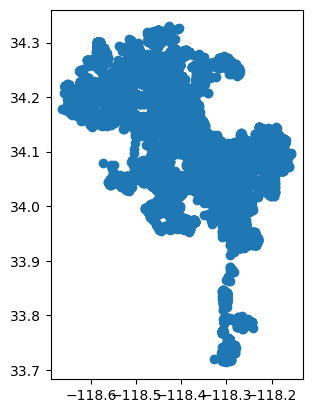

In [61]:
gdf_newunits.plot()

<AxesSubplot: >

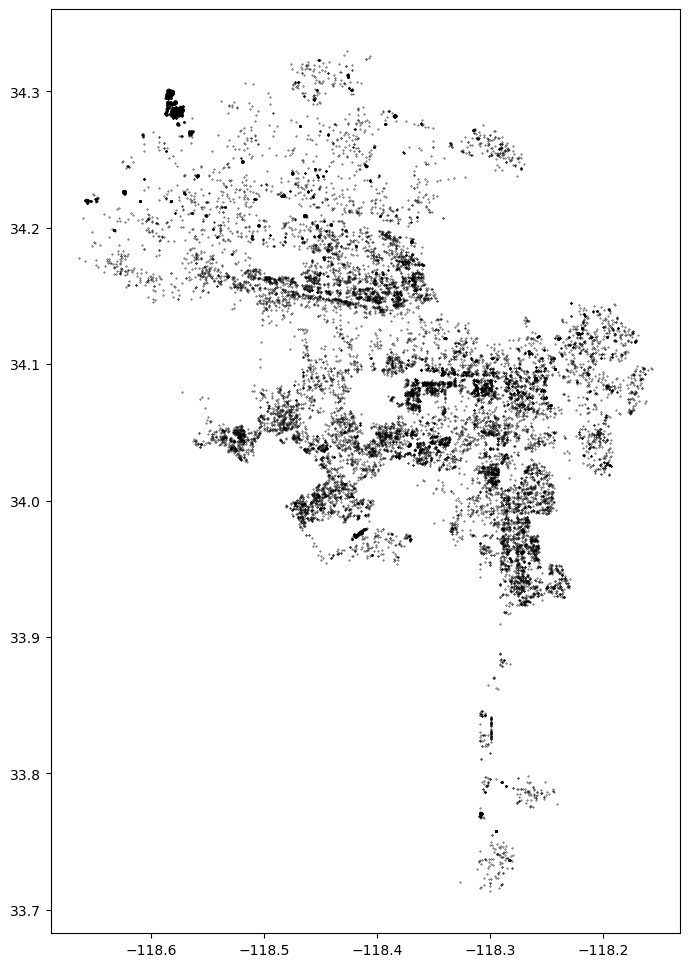

In [62]:
#making a prettier plot
gdf_newunits.plot(
            figsize=(20,12),   
            markersize = 0.1, 
            color = 'black',
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

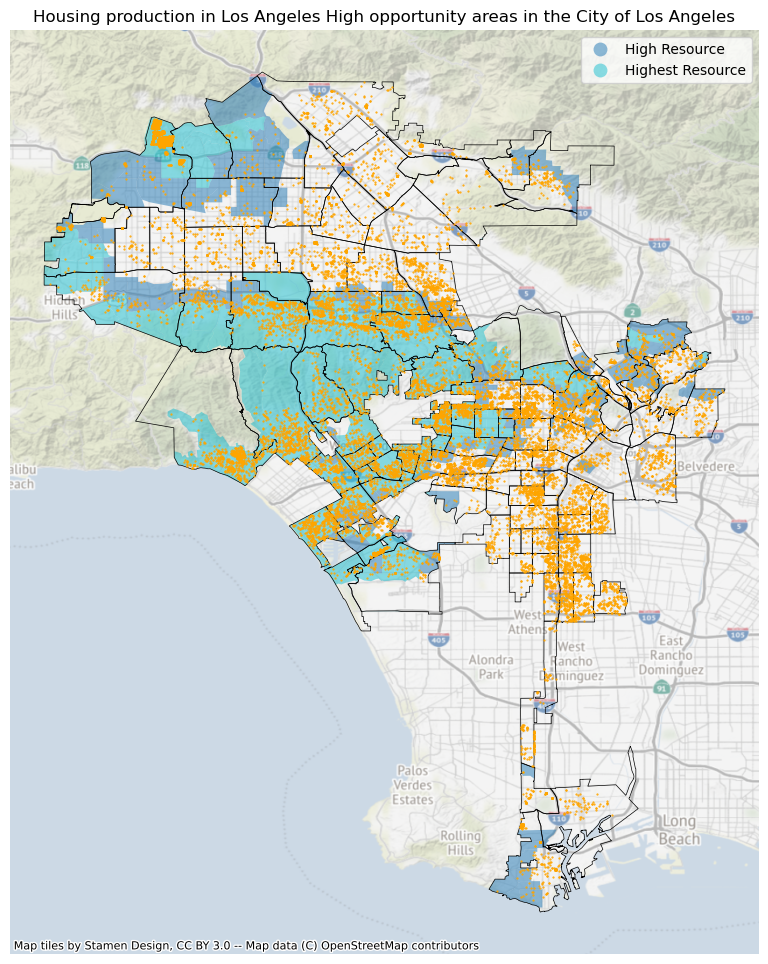

In [63]:
#now trying to map it all together
#plotting with neighborhood boundaries
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
TCAC_trimmed.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend        
            alpha = 0.5,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
neighborhoods.plot(
            ax=ax,                
            color = "none",        
            edgecolor = 'black',
            linewidth = 0.5,
            )
          
gdf_newunits.plot(
            ax=ax,   
            markersize = 0.3, 
            color = 'orange',
            legend = True,     # add a legend 
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
                'labels':'Housing units',
            }                  # this puts the legend to the side
) 
    
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Housing production in Los Angeles High opportunity areas in the City of Los Angeles')

# add a basemap at 40% transparency
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Stamen.Terrain, alpha=0.5)



In [64]:
# to get new units after 2016, we need to convert the data type to datetime64 format
import datetime 
newunits_trimmed['Issue Date']=pd.to_datetime(newunits_trimmed['Issue Date'], format='%m/%d/%Y')

/tmp/ipykernel_170/3278880491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed['Issue Date']=pd.to_datetime(newunits_trimmed['Issue Date'], format='%m/%d/%Y')


In [65]:
#filtering newunits after 2016
newunits_2016 = newunits_trimmed.loc[(newunits_trimmed['Issue Date'] > '12/31/2015') & (newunits_trimmed['Issue Date'] <'1/1/2023')]
newunits_2016.sample(10)

Tract Permit Type         Permit Sub-Type Issue Date  \
19666                TR 597    Bldg-New  1 or 2 Family Dwelling 2020-02-14   
3745               TR 13025    Bldg-New  1 or 2 Family Dwelling 2017-11-30   
17447               TR 9530    Bldg-New  1 or 2 Family Dwelling 2022-11-10   
13154              TR 73334    Bldg-New  1 or 2 Family Dwelling 2017-01-17   
7322   CARNATION PARK TRACT    Bldg-New  1 or 2 Family Dwelling 2017-10-25   
1279               TR 69968    Bldg-New  1 or 2 Family Dwelling 2022-01-11   
23491               TR 8637    Bldg-New               Apartment 2018-03-05   
8069               TR 50509    Bldg-New  1 or 2 Family Dwelling 2020-10-06   
591                 TR 1000    Bldg-New  1 or 2 Family Dwelling 2018-06-26   
17628               TR 1450    Bldg-New  1 or 2 Family Dwelling 2018-07-11   

       # of Residential Dwelling Units  AFFD          Zone  Census Tract  \
19666                                2  NOAH     RD1.5-1XL       1915.00   
3745                                 1  NOAH          R1-1       1414.00   
17447                                1  NOAH          RA-1       1373.01   
13154                                1  NOAH          RA-1       1316.00   
7322                                 1  NOAH       RD1.5-1       2733.00   
1279                                 1  NOAH  (Q)RD1.5-1-O       1095.00   
23491                               11  NOAH          R1-1       1241.04   
8069                                 1  NOAH       [T]RE-1       1082.02   
591                                  1  NOAH    (T)(Q)R3-1       1341.03   
17628                                1  NOAH      RE15-1-H       1437.00   

       Latitude  Longitude                     geometry  
19666  34.08740 -118.29885  POINT (-118.29885 34.08740)  
3745   34.15084 -118.47232  POINT (-118.47232 34.15084)  
17447  34.17722 -118.63745  POINT (-118.63745 34.17722)  
13154  34.20915 -118.55090  POINT (-118.55090 34.20915)  
7322   33.99804 -118.47248  POINT (-118.47248 33.99804)  
1279   34.26862 -118.44298  POINT (-118.44298 34.26862)  
23491  34.18517 -118.38328  POINT (-118.38328 34.18517)  
8069   34.28526 -118.57600  POINT (-118.57600 34.28526)  
591    34.21987 -118.58192  POINT (-118.58192 34.21987)  
17628  34.12337 -118.35407  POINT (-118.35407 34.12337)

In [66]:
newunits_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13733 entries, 0 to 25061
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tract                            13688 non-null  object        
 1   Permit Type                      13733 non-null  object        
 2   Permit Sub-Type                  13733 non-null  object        
 3   Issue Date                       13733 non-null  datetime64[ns]
 4   # of Residential Dwelling Units  13733 non-null  int64         
 5   AFFD                             13733 non-null  object        
 6   Zone                             13708 non-null  object        
 7   Census Tract                     13733 non-null  float64       
 8   Latitude                         13733 non-null  float64       
 9   Longitude                        13733 non-null  float64       
 10  geometry                         13733 non-null  geometry 

In [67]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_newunits_2016 = gpd.GeoDataFrame(newunits_2016, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(newunits_2016.Longitude, newunits_2016.Latitude))

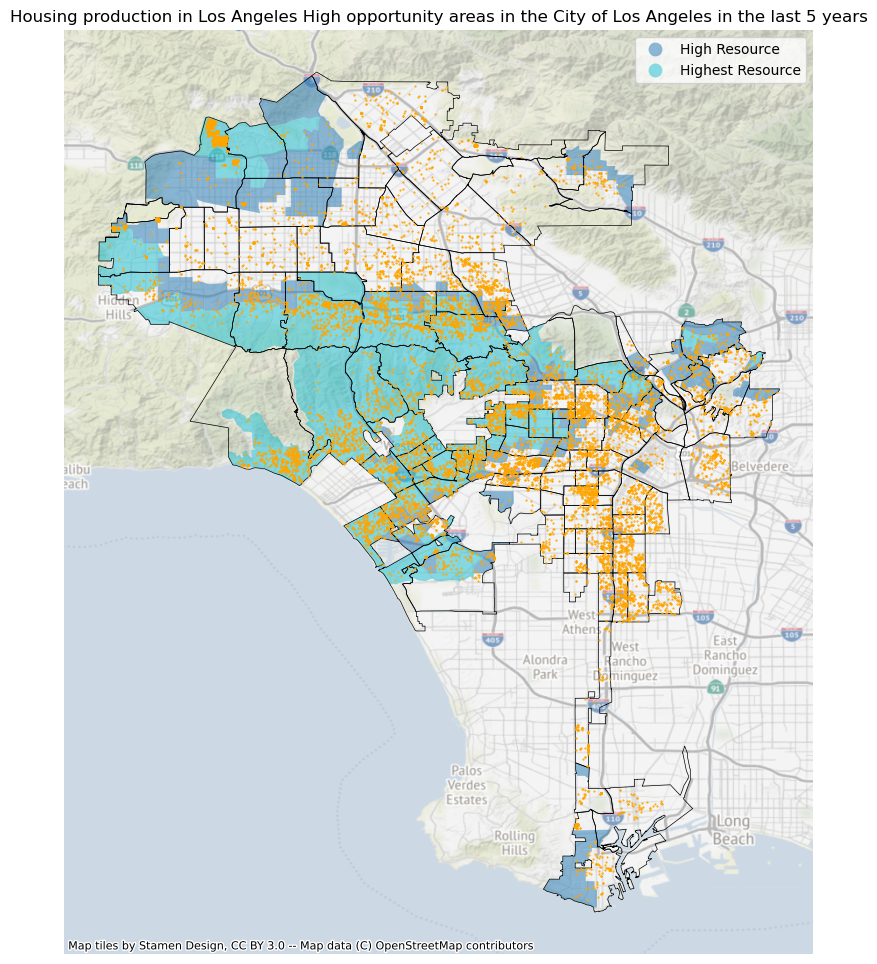

In [68]:
#now trying to map it all together
#plotting with neighborhood boundaries
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
TCAC_trimmed.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend        
            alpha = 0.5,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
neighborhoods.plot(
            ax=ax,                
            color = "none",        
            edgecolor = 'black',
            linewidth = 0.5,
            )
          
gdf_newunits_2016.plot(
            ax=ax,   
            markersize = 0.3, 
            color = 'orange',
            legend = True,     # add a legend 
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
                'labels':'Housing units',
            }                  # this puts the legend to the side
) 
    
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Housing production in Los Angeles High opportunity areas in the City of Los Angeles in the last 5 years')

# add a basemap at 40% transparency
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Stamen.Terrain, alpha=0.5)



## Affordable Housing production in Los Angeles

In [69]:
#separating housing permits based on affordable housing permits. True = affordable housing project
newunits_trimmed['AFFD'].value_counts()

NOAH    19525
AH        176
Name: AFFD, dtype: int64

In [70]:
type(newunits_trimmed)

pandas.core.frame.DataFrame

In [71]:
newunits_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 25061
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tract                            19636 non-null  object        
 1   Permit Type                      19701 non-null  object        
 2   Permit Sub-Type                  19701 non-null  object        
 3   Issue Date                       19701 non-null  datetime64[ns]
 4   # of Residential Dwelling Units  19701 non-null  int64         
 5   AFFD                             19701 non-null  object        
 6   Zone                             19675 non-null  object        
 7   Census Tract                     19699 non-null  float64       
 8   Latitude                         19701 non-null  float64       
 9   Longitude                        19701 non-null  float64       
 10  geometry                         19701 non-null  geometry 

In [72]:
#assigning colors to each project based on whether it was a affordable housing project or not
newunits_trimmed.loc[newunits_trimmed['AFFD'] == 'AH', 'color_AFFD'] = '#FA7B6E'
newunits_trimmed.loc[newunits_trimmed['AFFD'] == 'NOAH', 'color_AFFD'] = '#F0D256'

/tmp/ipykernel_170/2853130391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed.loc[newunits_trimmed['AFFD'] == 'AH', 'color_AFFD'] = '#FA7B6E'


In [73]:
newunits_trimmed.sample(10)

Tract    Permit Type         Permit Sub-Type Issue Date  \
8146              TR 5397       Bldg-New  1 or 2 Family Dwelling 2014-01-23   
8998              TR 9377       Bldg-New  1 or 2 Family Dwelling 2022-03-29   
2330   SECTION 2 WESTBORO       Bldg-New  1 or 2 Family Dwelling 2019-01-02   
4978              TR 6250       Bldg-New  1 or 2 Family Dwelling 2015-10-08   
20842             TR 6097       Bldg-New  1 or 2 Family Dwelling 2018-01-25   
14048      HYPERION TRACT  Bldg-Addition  1 or 2 Family Dwelling 2013-10-25   
7648              TR 9924       Bldg-New  1 or 2 Family Dwelling 2019-01-18   
12110             TR 2635       Bldg-New  1 or 2 Family Dwelling 2015-04-28   
3475              TR 6790       Bldg-New  1 or 2 Family Dwelling 2016-09-29   
17567         HOWES TRACT  Bldg-Addition  1 or 2 Family Dwelling 2022-11-29   

       # of Residential Dwelling Units  AFFD     Zone  Census Tract  Latitude  \
8146                                 1  NOAH    RD6-1       1310.10  34.21552   
8998                                 1  NOAH   RE11-1       2627.06  34.03220   
2330                                 1  NOAH     R3-1       1924.20  34.08005   
4978                                 1  NOAH  R1-1VLD       2731.00  33.99769   
20842                                2  NOAH     R2-1       2398.01  33.96570   
14048                                1  NOAH   R2-1VL       1954.00  34.09442   
7648                                 1  NOAH     R1-1       2654.20  34.06798   
12110                                1  NOAH     R3-1       1924.10  34.07908   
3475                                 1  NOAH     R1-1       1945.00  34.07843   
17567                                1  NOAH  RD1.5-1       2226.00  34.02288   

       Longitude                     geometry color_AFFD  
8146  -118.53751  POINT (-118.53751 34.21552)    #F0D256  
8998  -118.52176  POINT (-118.52176 34.03220)    #F0D256  
2330  -118.31164  POINT (-118.31164 34.08005)    #F0D256  
4978  -118.45904  POINT (-118.45904 33.99769)    #F0D256  
20842 -118.26176  POINT (-118.26176 33.96570)    #F0D256  
14048 -118.27821  POINT (-118.27821 34.09442)    #F0D256  
7648  -118.46048  POINT (-118.46048 34.06798)    #F0D256  
12110 -118.31588  POINT (-118.31588 34.07908)    #F0D256  
3475  -118.36491  POINT (-118.36491 34.07843)    #F0D256  
17567 -118.29832  POINT (-118.29832 34.02288)    #F0D256

<AxesSubplot: >

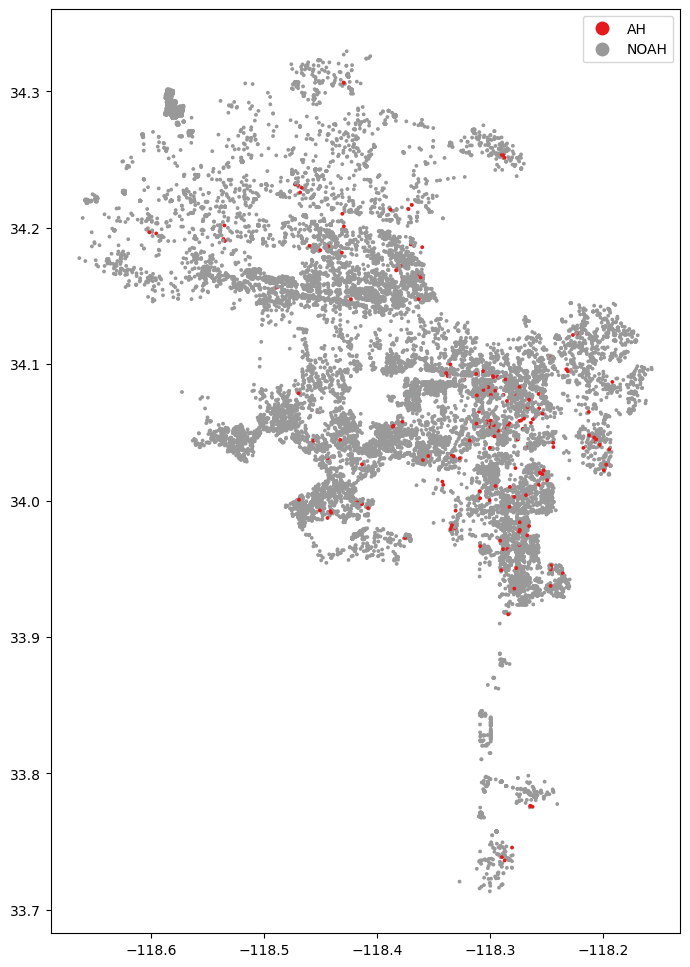

In [74]:
#making a lt with affordable and market rate units
gdf_newunits.plot(
            figsize=(20,12),   
            markersize = 3, 
            column = 'AFFD',
            cmap='Set1',
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

In [75]:
#filtering only affordable housing projects
newunits_AH = newunits_trimmed.loc[newunits_trimmed['AFFD'] == 'AH']

In [76]:
newunits_AH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 10984 to 24977
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tract                            175 non-null    object        
 1   Permit Type                      176 non-null    object        
 2   Permit Sub-Type                  176 non-null    object        
 3   Issue Date                       176 non-null    datetime64[ns]
 4   # of Residential Dwelling Units  176 non-null    int64         
 5   AFFD                             176 non-null    object        
 6   Zone                             176 non-null    object        
 7   Census Tract                     176 non-null    float64       
 8   Latitude                         176 non-null    float64       
 9   Longitude                        176 non-null    float64       
 10  geometry                         176 non-null    geometr

In [77]:
#converting the new dataset newunits_AH from df to gdf
gdf_newunits_AH = gpd.GeoDataFrame(newunits_AH, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(newunits_AH.Longitude, newunits_AH.Latitude))

<AxesSubplot: >

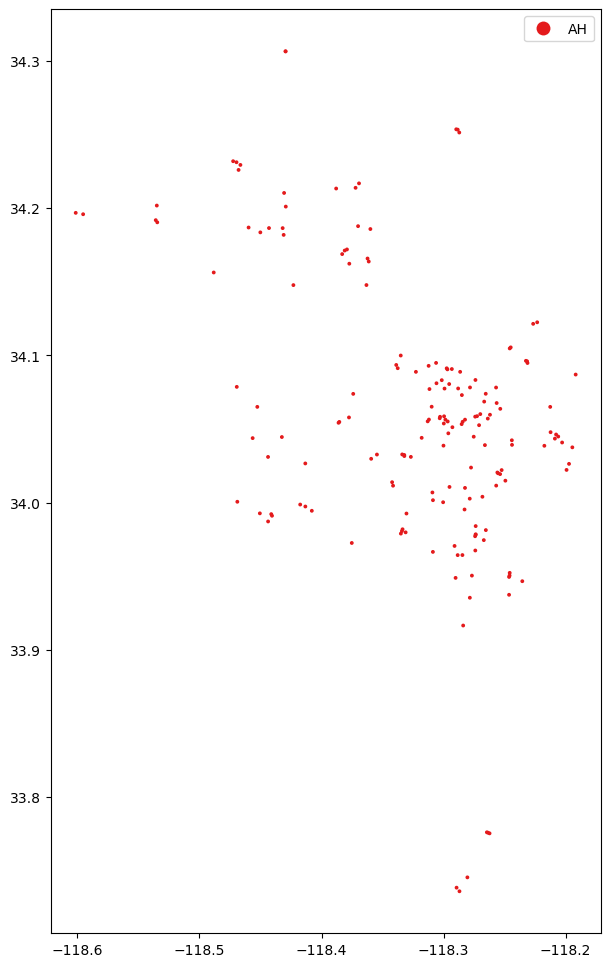

In [78]:
gdf_newunits_AH.plot(
                    figsize=(20,12),   
                    markersize = 3, 
                    column = 'AFFD',
                    cmap='Set1',
                    legend = True,     # add a legend           
                    legend_kwds={
                       'loc': 'upper right',
                       'bbox_to_anchor':(1,1)
                    }                  # this puts the legend to the side
)  

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


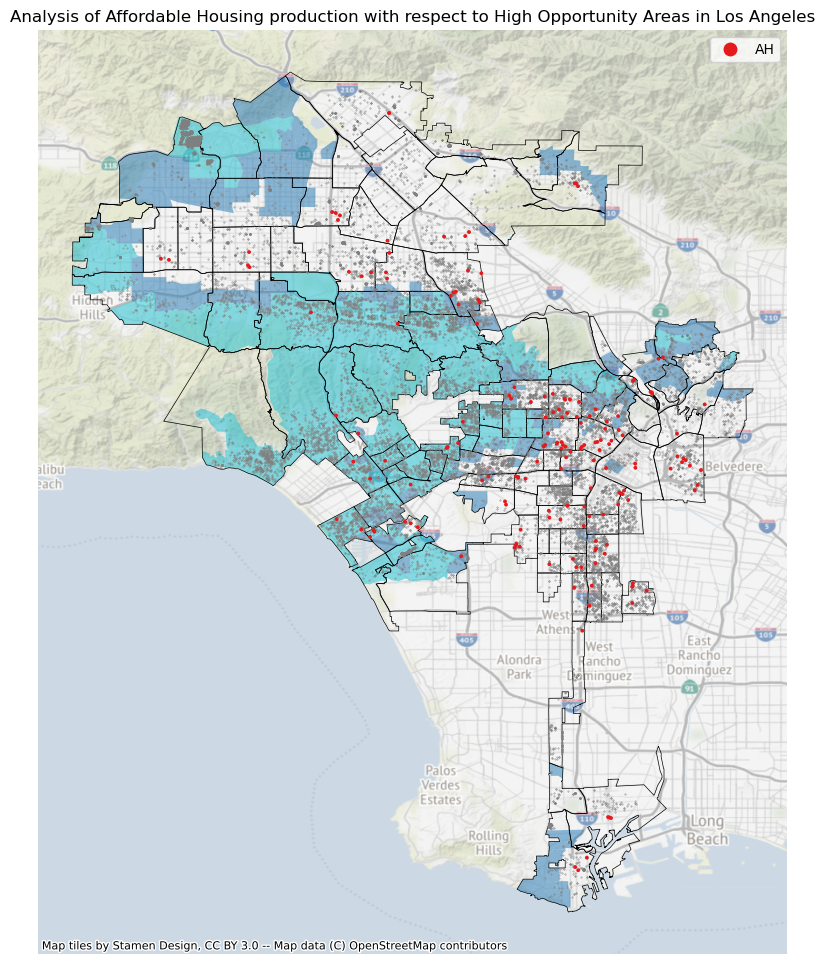

In [79]:
#now trying to map it all together
#plotting with neighborhood boundaries
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
TCAC_trimmed.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend        
            alpha = 0.5,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
neighborhoods.plot(
            ax=ax,                
            color = "none",        
            edgecolor = 'black',
            linewidth = 0.5,
            )

gdf_newunits.plot(
            ax = ax,   
            markersize = 0.1, 
            column = 'AFFD',
            color = 'grey',
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

gdf_newunits_AH.plot(
                    ax = ax,   
                    markersize = 3, 
                    column = 'AFFD',
                    cmap='Set1',
                    legend = True,     # add a legend           
                    legend_kwds={
                       'loc': 'upper right',
                       'bbox_to_anchor':(1,1)
                    }                  # this puts the legend to the side
)  

    
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Analysis of Affordable Housing production with respect to High Opportunity Areas in Los Angeles')

# add a basemap at 40% transparency
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Stamen.Terrain, alpha=0.5)



In [80]:
#creating a dataset with only affordable housing 
gdf_newunitsAH_2016 = gdf_newunits_2016.loc[gdf_newunits_2016['AFFD'] == 'AH']
gdf_newunitsAH_2016.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 143 entries, 10984 to 24977
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tract                            142 non-null    object        
 1   Permit Type                      143 non-null    object        
 2   Permit Sub-Type                  143 non-null    object        
 3   Issue Date                       143 non-null    datetime64[ns]
 4   # of Residential Dwelling Units  143 non-null    int64         
 5   AFFD                             143 non-null    object        
 6   Zone                             143 non-null    object        
 7   Census Tract                     143 non-null    float64       
 8   Latitude                         143 non-null    float64       
 9   Longitude                        143 non-null    float64       
 10  geometry                         143 non-null   

In [81]:
gdf_newunits_AH.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 10984 to 24977
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tract                            175 non-null    object        
 1   Permit Type                      176 non-null    object        
 2   Permit Sub-Type                  176 non-null    object        
 3   Issue Date                       176 non-null    datetime64[ns]
 4   # of Residential Dwelling Units  176 non-null    int64         
 5   AFFD                             176 non-null    object        
 6   Zone                             176 non-null    object        
 7   Census Tract                     176 non-null    float64       
 8   Latitude                         176 non-null    float64       
 9   Longitude                        176 non-null    float64       
 10  geometry                         176 non-null   

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


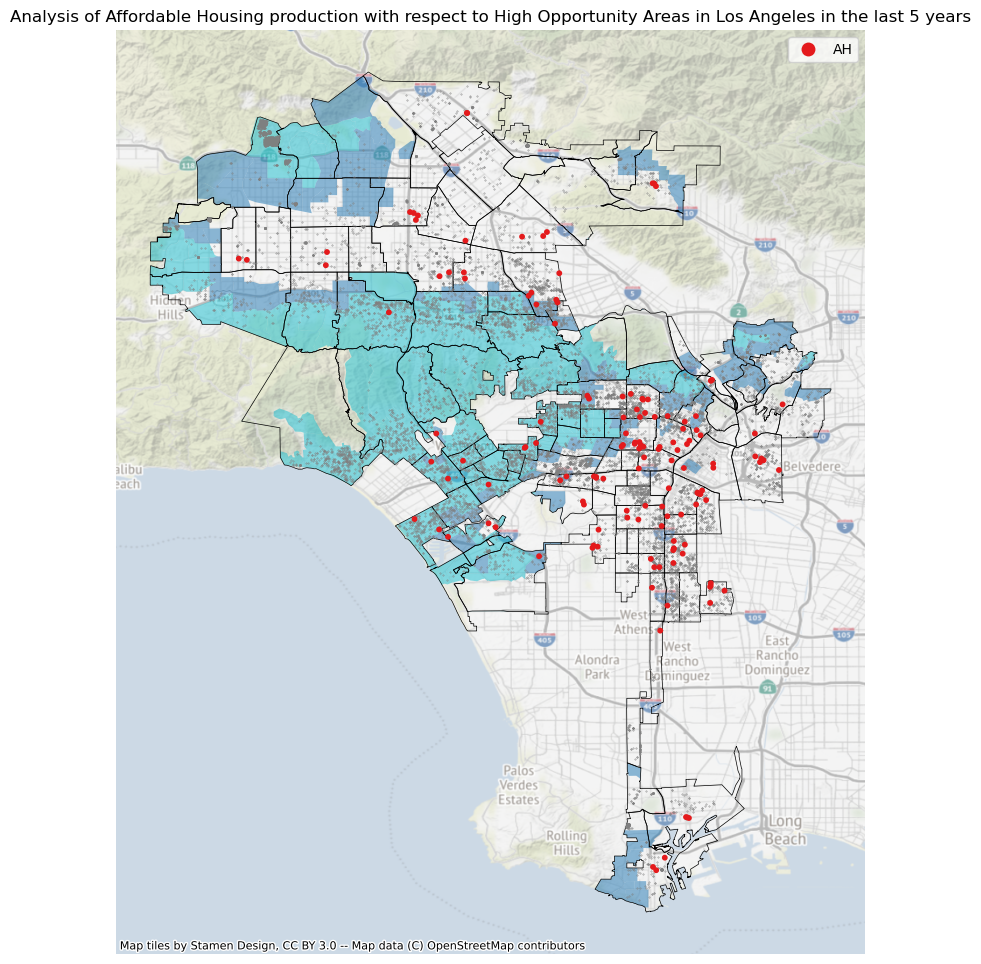

In [89]:
#plotting affordable housing projects within the last 5 years
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
TCAC_trimmed.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend        
            alpha = 0.5,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
neighborhoods.plot(
            ax=ax,                
            color = "none",        
            edgecolor = 'black',
            linewidth = 0.5,
            )

gdf_newunits_2016.plot(
            ax = ax,   
            markersize = 0.1, 
            column = 'AFFD',
            color = 'grey',
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

gdf_newunitsAH_2016.plot(
                    ax = ax,   
                    markersize = 10, 
                    column = 'AFFD',
                    cmap='Set1',
                    legend = True,     # add a legend           
                    legend_kwds={
                       'loc': 'upper right',
                       'bbox_to_anchor':(1,1)
                    }                  # this puts the legend to the side
)  

    
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Analysis of Affordable Housing production with respect to High Opportunity Areas in Los Angeles in the last 5 years')

# add a basemap at 40% transparency
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Stamen.Terrain, alpha=0.5)



In [83]:
#doing a spatial join to get all the data in one data set to generate charts
#before doing that, check if all are in the same crs
TCAC_trimmed.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [84]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
gdf_newunitsAH_2016.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
#since they are in the same coordinate system, lets do a spatial join
AH_nb = gpd.sjoin(neighborhoods, gdf_newunitsAH_2016) #Spatial join 
AH_nb.sample(5)

OBJECTID             name  \
91         92      Toluca Lake   
9          10    Boyle Heights   
93         94  University Park   
52         53        Koreatown   
102       103            Watts   

                                              geometry  index_right  \
91   POLYGON ((-118.35717 34.16310, -118.35716 34.1...        23636   
9    POLYGON ((-118.19263 34.06077, -118.19260 34.0...        24450   
93   POLYGON ((-118.27986 34.01848, -118.28294 34.0...        24660   
52   POLYGON ((-118.28785 34.06182, -118.28783 34.0...        24372   
102  POLYGON ((-118.24423 33.95379, -118.24423 33.9...        24122   

                                        Tract Permit Type Permit Sub-Type  \
91                                   TR 12200    Bldg-New       Apartment   
9        SUBDIVISION OF THE CHEESBROUGH TRACT    Bldg-New      Commercial   
93                    STEWART'S NURSERY TRACT    Bldg-New       Apartment   
52                                    TR 7502    Bldg-New       Apartment   
102  AMENDED PLAT OF A PORTION OF ALTON TRACT    Bldg-New       Apartment   

    Issue Date  # of Residential Dwelling Units AFFD         Zone  \
91  2020-11-18                               14   AH  [Q]R3-1-RIO   
9   2021-12-09                               49   AH    R3-1-CUGU   
93  2019-04-25                               73   AH        C2-1L   
52  2022-04-14                               44   AH         R5-2   
102 2022-05-02                               29   AH  C2-1VL-CPIO   

     Census Tract  Latitude  Longitude  
91        1431.00  34.14775 -118.36323  
9         2039.00  34.03756 -118.19457  
93        2247.00  34.02382 -118.27756  
52        2123.04  34.05863 -118.29964  
102       2420.00  33.93745 -118.24640

<AxesSubplot: >

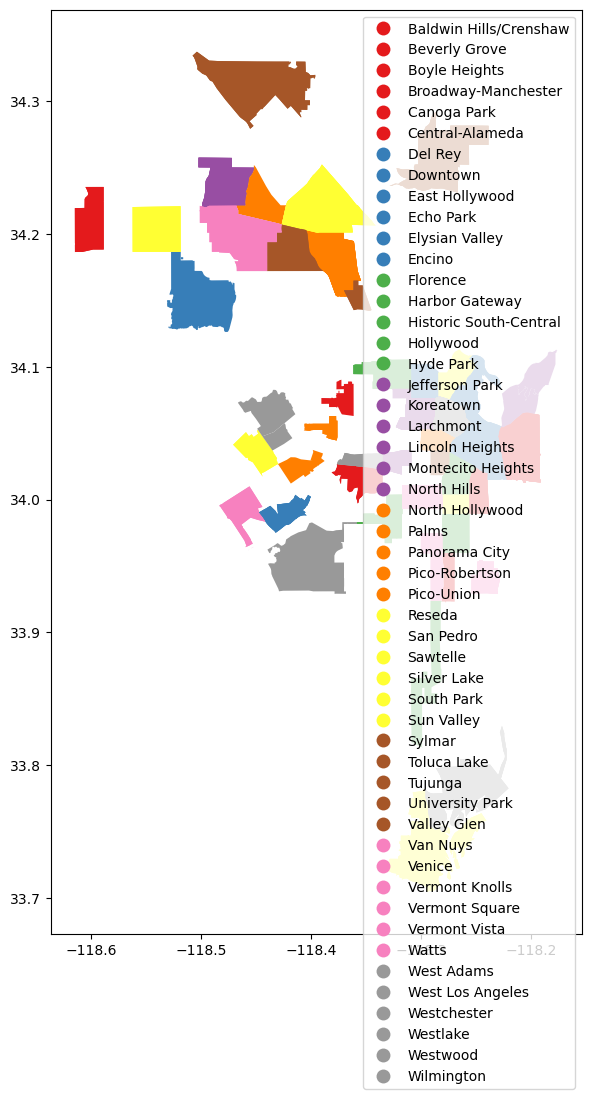

In [87]:
AH_nb.plot( figsize=(20,12),    
                    column = 'name',
                    cmap='Set1',
                    legend = True,     # add a legend           
                    legend_kwds={
                       'loc': 'upper right',
                       'bbox_to_anchor':(1,1)
                    }                  # this puts the legend to the side
)  

In [88]:
#since they are in the same coordinate system, lets do a spatial join
TCAC_nb_AH = gpd.sjoin(gdf_newunitsAH_2016, TCAC_nb) #Spatial join polygons to polygons
TCAC_nb_AH.sample(5)

NameError: name 'TCAC_nb' is not defined

In [ ]:
#changing the names of columns in TCAC_nb
TCAC_nb = TCAC_nb.rename(columns= {'OBJECTID_left': 'L_OBID', 'OBJECTID_right': 'R_OBID'})

In [ ]:
gdf_newunitsAH_2016.sample(5)